In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random lats and longs combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the lats and lngs to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []
# Identitfy the nearest city for each lat and lng combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique add to list of cities
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

656

In [6]:
# Import Dependencies
from datetime import datetime
import requests
from config import weather_api_key

In [7]:
# Create starting url for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
#Create empty list for city data and to loop through
city_data = []
# Print the beginning of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loops through all the cities in the list
for i, city in enumerate(cities):
    # Group cities in sets of 50 to log process as we find the weather data for each city
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
    # Create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

rd 50 of Set 4 | lishu
Processing Record 1 of Set 5 | kavaratti
Processing Record 2 of Set 5 | madang
Processing Record 3 of Set 5 | lorengau
Processing Record 4 of Set 5 | marsa matruh
Processing Record 5 of Set 5 | bambanglipuro
Processing Record 6 of Set 5 | yellowknife
Processing Record 7 of Set 5 | hithadhoo
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | praia da vitoria
Processing Record 10 of Set 5 | assis
Processing Record 11 of Set 5 | amderma
City not found. Skipping...
Processing Record 12 of Set 5 | meulaboh
Processing Record 13 of Set 5 | rungata
City not found. Skipping...
Processing Record 14 of Set 5 | flinders
Processing Record 15 of Set 5 | camalu
Processing Record 16 of Set 5 | sao filipe
Processing Record 17 of Set 5 | alekseyevsk
Processing Record 18 of Set 5 | west des moines
Processing Record 19 of Set 5 | sao felix do xingu
Processing Record 20 of Set 5 | jasper
Processing Record 21 of Set 5 | severnoye
Processing Record 22 of Set 5 |

In [11]:
# Add data to a list in dicitonary format and convert to dataframe
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Rosa,14.3122,121.1114,75.99,100,20,1.14,PH,2021-01-27 21:52:05
1,Atuona,-9.8000,-139.0333,78.46,79,3,15.30,PF,2021-01-27 21:52:05
2,Codrington,-38.2667,141.9667,65.55,72,63,16.75,AU,2021-01-27 21:52:06
3,Rikitea,-23.1203,-134.9692,79.88,73,89,13.15,PF,2021-01-27 21:52:06
4,Naze,28.3667,129.4833,62.60,63,75,11.50,JP,2021-01-27 21:51:35
5,Novoagansk,61.9449,76.6625,-35.88,80,64,3.00,RU,2021-01-27 21:52:06
6,Panalingaan,8.7842,117.4231,77.76,83,100,8.48,PH,2021-01-27 21:52:07
7,Bluff,-46.6000,168.3333,52.00,82,99,17.00,NZ,2021-01-27 21:52:09
8,Barrow,71.2906,-156.7887,-11.20,70,90,6.91,US,2021-01-27 21:52:12
9,Rincon,32.2960,-81.2354,57.20,88,90,10.36,US,2021-01-27 21:47:17


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santa Rosa,PH,2021-01-27 21:52:05,14.3122,121.1114,75.99,100,20,1.14
1,Atuona,PF,2021-01-27 21:52:05,-9.8000,-139.0333,78.46,79,3,15.30
2,Codrington,AU,2021-01-27 21:52:06,-38.2667,141.9667,65.55,72,63,16.75
3,Rikitea,PF,2021-01-27 21:52:06,-23.1203,-134.9692,79.88,73,89,13.15
4,Naze,JP,2021-01-27 21:51:35,28.3667,129.4833,62.60,63,75,11.50
...,...,...,...,...,...,...,...,...,...
597,Chino Valley,US,2021-01-27 21:55:02,34.7575,-112.4538,37.99,60,1,8.05
598,Methoni,GR,2021-01-27 21:55:02,36.8197,21.7049,45.00,65,27,3.44
599,Champerico,GT,2021-01-27 21:51:05,14.3000,-91.9167,91.40,52,40,9.22
600,Songea,TZ,2021-01-27 21:55:04,-10.6833,35.6500,64.20,98,55,3.00


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

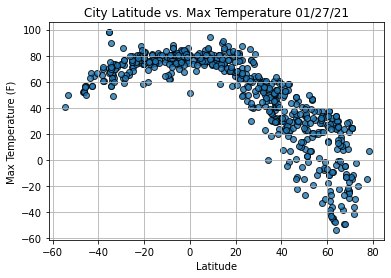

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

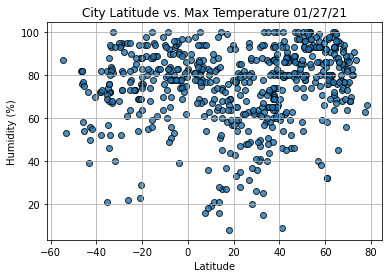

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

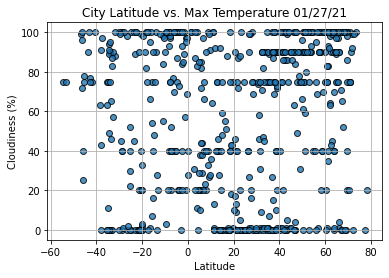

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

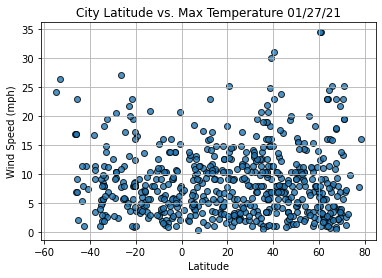

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()